In [1]:
import GraphHelper as gr
from preprocessor import *
from recommender import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import LabelEncoder
from stellargraph import StellarGraph
from stellargraph.mapper import Attri2VecNodeGenerator, GraphSAGENodeGenerator
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

[nltk_data] Error loading stopwords: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


In [4]:
nodes = pd.read_csv("Dataset/nodes.csv")
nodes = nodes.set_index("Id")
alinks = pd.read_csv("Dataset/alinks.csv")
bilinks = pd.read_csv("Dataset/bilinks.csv")
clinks = create_clinks(bilinks,nodes)

### Creating Product Graph

In [5]:
G = nx.from_pandas_edgelist(alinks, source='source', target='target')

In [7]:
missing_nodes = list(set(nodes.index)-set(G.nodes()))
print(len(missing_nodes))
G.add_nodes_from(missing_nodes)

0


In [8]:
gr.net_prop_dict(G)

{'no_of_nodes': 542664,
 'no_of_edges': 236429,
 'transitivity': 0.007141223411014257,
 'average_clustering': 0.003951630468176218,
 'edge_density': 1.6057188950565498e-06,
 'average_degree': 0.8713642327480725,
 'total_triangles': 3372,
 'number_connected_components': 307498}

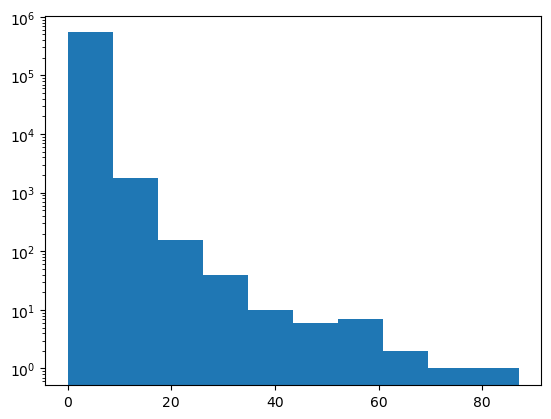

In [9]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
plt.yscale("log")
plt.show()

In [10]:
degree_centrality = nx.degree_centrality(G)

In [11]:
closeness_centrality = nx.closeness_centrality(G)

In [12]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [13]:
katz_centrality = nx.katz_centrality(G)

In [14]:
pagerank_centrality = nx.pagerank(G)

In [15]:
centralities = {"degree": degree_centrality, "closeness": closeness_centrality, "eigen": eigenvector_centrality, 
                "katz": katz_centrality, "pagerank": pagerank_centrality}
top = pd.DataFrame(columns=["Id","measure","value"])
for centr in centralities:
    sorted_centrality = {k: v for k, v in sorted(centralities[centr].items(), key=lambda item: item[1], reverse=True)}
    top10_ids = list(sorted_centrality.keys())[:10]
    top10_vals = list(sorted_centrality.values())[:10]
    top = pd.concat([top, pd.DataFrame({"Id": top10_ids, "measure": centr, "value": top10_vals})],axis=0)

In [16]:
top = top.set_index("Id")
top = top.join(nodes[["Title","Group"]])

### Top Products

In [20]:
top

,measure,value,Title,Group
Id,,,,
27832,degree,0.000103,The Winter's Tale (Folger Shakespeare Library),Book
27832,closeness,0.000185,The Winter's Tale (Folger Shakespeare Library),Book
27832,katz,0.023843,The Winter's Tale (Folger Shakespeare Library),Book
27832,pagerank,0.000051,The Winter's Tale (Folger Shakespeare Library),Book
45146,degree,0.000111,Taber's Cyclopedic Medical Dictionary -Thumb-I...,Book
45146,katz,0.021201,Taber's Cyclopedic Medical Dictionary -Thumb-I...,Book
45146,pagerank,0.000054,Taber's Cyclopedic Medical Dictionary -Thumb-I...,Book
50483,eigen,0.072800,Gilda,DVD
55387,degree,0.000105,Getting to Yes: Negotiating Agreement Without ...,Book
